In [4]:
import numpy as np 
import pandas as pd

In [22]:
df = pd.read_csv('iris.csv')

In [23]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [24]:
df = df.iloc[:,1:]

In [25]:
df.head()

,sepal_width,petal_length,petal_width,species
0,3.5,1.4,0.2,setosa
1,3.0,1.4,0.2,setosa
2,3.2,1.3,0.2,setosa
3,3.1,1.5,0.2,setosa
4,3.6,1.4,0.2,setosa


In [26]:
df.shape


(150, 4)

In [27]:
from sklearn.preprocessing import LabelEncoder

In [28]:
encoder = LabelEncoder()

In [29]:
df['species'] = encoder.fit_transform(df['species'])

In [30]:
df.head()

,sepal_width,petal_length,petal_width,species
0,3.5,1.4,0.2,0
1,3.0,1.4,0.2,0
2,3.2,1.3,0.2,0
3,3.1,1.5,0.2,0
4,3.6,1.4,0.2,0


In [31]:
df = df[df['species'] != 0][['sepal_width','petal_length','species']]

In [32]:
df.head()


,sepal_width,petal_length,species
50,3.2,4.7,1
51,3.2,4.5,1
52,3.1,4.9,1
53,2.3,4.0,1
54,2.8,4.6,1


In [33]:
import seaborn as sns
import matplotlib.pyplot as plt

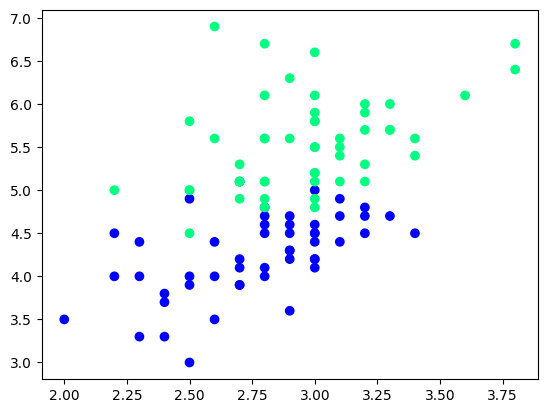

In [34]:
plt.scatter(df['sepal_width'],df['petal_length'],c=df['species'],cmap='winter')

In [35]:
df_train = df.iloc[:60,:].sample(10)
df_train

,sepal_width,petal_length,species
50,3.2,4.7,1
69,2.5,3.9,1
59,2.7,3.9,1
61,3.0,4.2,1
107,2.9,6.3,2
53,2.3,4.0,1
72,2.5,4.9,1
96,2.9,4.2,1
70,3.2,4.8,1
64,2.9,3.6,1


In [36]:
# Taking only 10 rows for training
df = df.sample(100)
df_train = df.iloc[:60,:].sample(10)
df_val = df.iloc[60:80,:].sample(5)
df_test = df.iloc[80:,:].sample(5)

In [37]:
df_train

,sepal_width,petal_length,species
67,2.7,4.1,1
66,3.0,4.5,1
94,2.7,4.2,1
55,2.8,4.5,1
76,2.8,4.8,1
59,2.7,3.9,1
133,2.8,5.1,2
131,3.8,6.4,2
104,3.0,5.8,2
103,2.9,5.6,2


In [38]:
df_val

,sepal_width,petal_length,species
123,2.7,4.9,2
53,2.3,4.0,1
139,3.1,5.4,2
61,3.0,4.2,1
82,2.7,3.9,1


In [39]:
df_test

,sepal_width,petal_length,species
136,3.4,5.6,2
51,3.2,4.5,1
63,2.9,4.7,1
75,3.0,4.4,1
93,2.3,3.3,1


In [40]:
X_test = df_val.iloc[:,0:2].values
y_test = df_val.iloc[:,-1].values

In [41]:
y_test

array([2, 1, 2, 1, 1])

# Case 1 - Bagging

In [42]:
# Data for Tree 1
df_bag = df_train.sample(8,replace=True)

X = df_bag.iloc[:,0:2]
y = df_bag.iloc[:,-1]

df_bag

,sepal_width,petal_length,species
76,2.8,4.8,1
94,2.7,4.2,1
66,3.0,4.5,1
133,2.8,5.1,2
66,3.0,4.5,1
103,2.9,5.6,2
59,2.7,3.9,1
131,3.8,6.4,2


In [43]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from mlxtend.plotting import plot_decision_regions
from sklearn.metrics import accuracy_score

In [45]:
def evaluate(clf,X,y):
    clf.fit(X,y)
    plot_tree(clf)
    plt.show()
    plot_decision_regions(X.values, y.values, clf=clf, legend=2)
    y_pred = clf.predict(X_test)
    print(accuracy_score(y_test,y_pred))

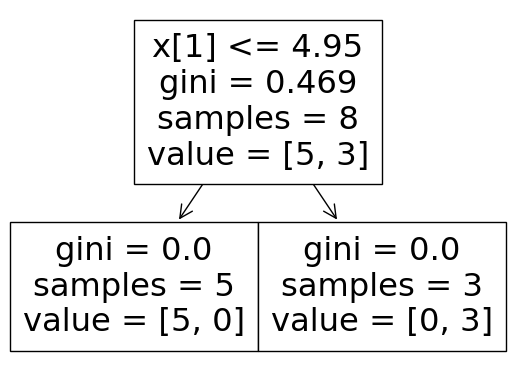

0.8


c:\Users\DESKTOP\anaconda3\envs\python_ml\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
c:\Users\DESKTOP\anaconda3\envs\python_ml\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


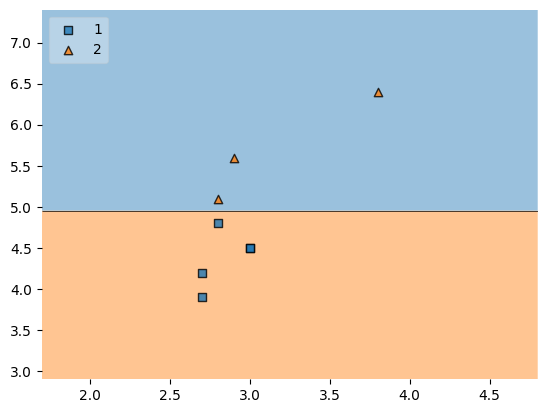

In [46]:
dt_bag1 = DecisionTreeClassifier()
evaluate(dt_bag1,X,y)

In [47]:
# Data for Tree 1
df_bag = df_train.sample(8,replace=True)

# Fetch X and y
X = df_bag.iloc[:,0:2]
y = df_bag.iloc[:,-1]

# print df_bag
df_bag

,sepal_width,petal_length,species
94,2.7,4.2,1
67,2.7,4.1,1
55,2.8,4.5,1
104,3.0,5.8,2
76,2.8,4.8,1
59,2.7,3.9,1
131,3.8,6.4,2
133,2.8,5.1,2


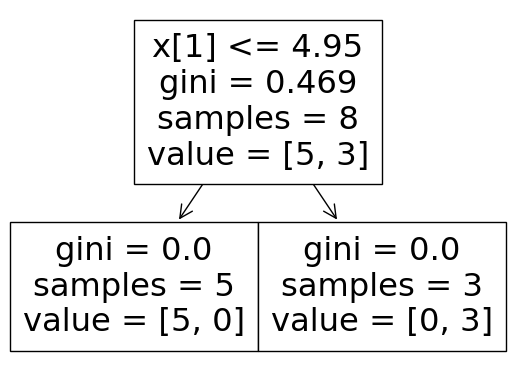

0.8


c:\Users\DESKTOP\anaconda3\envs\python_ml\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
c:\Users\DESKTOP\anaconda3\envs\python_ml\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


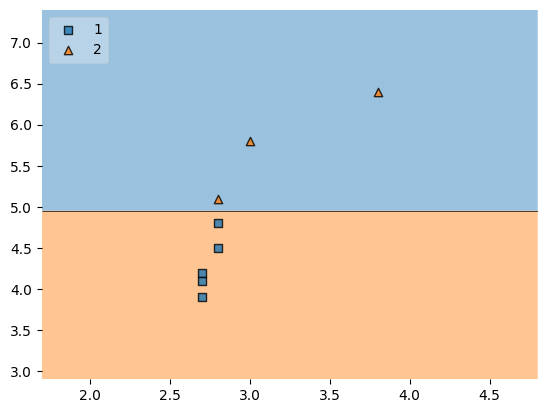

In [48]:
dt_bag2 = DecisionTreeClassifier()
evaluate(dt_bag2,X,y)

In [49]:
# Data for Tree 1
df_bag = df_train.sample(8,replace=True)

# Fetch X and y
X = df_bag.iloc[:,0:2]
y = df_bag.iloc[:,-1]

# print df_bag
df_bag

,sepal_width,petal_length,species
76,2.8,4.8,1
133,2.8,5.1,2
131,3.8,6.4,2
133,2.8,5.1,2
66,3.0,4.5,1
66,3.0,4.5,1
76,2.8,4.8,1
59,2.7,3.9,1


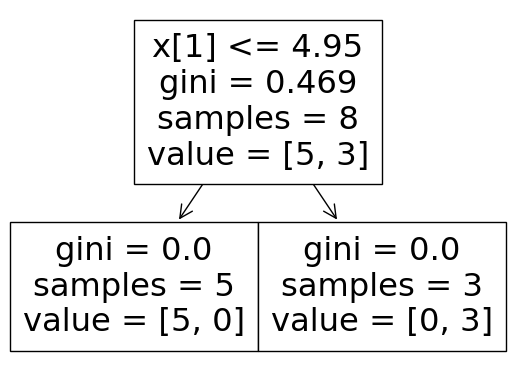

0.8


c:\Users\DESKTOP\anaconda3\envs\python_ml\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
c:\Users\DESKTOP\anaconda3\envs\python_ml\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


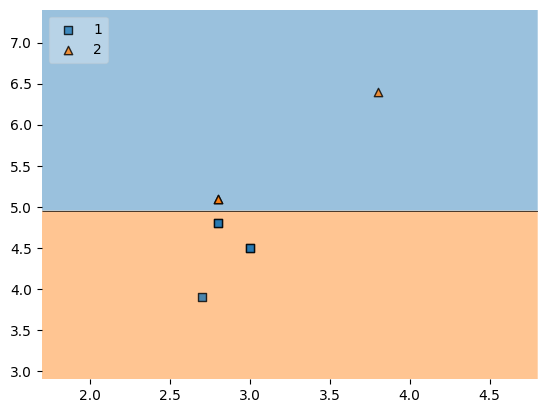

In [50]:
dt_bag3 = DecisionTreeClassifier()
evaluate(dt_bag3,X,y)

# Predict

In [51]:
df_test

,sepal_width,petal_length,species
136,3.4,5.6,2
51,3.2,4.5,1
63,2.9,4.7,1
75,3.0,4.4,1
93,2.3,3.3,1


In [54]:
print("Predictor 1",dt_bag1.predict(np.array([2.9,4.0]).reshape(1,2)))
print("Predictor 2",dt_bag2.predict(np.array([2.9,4.0]).reshape(1,2)))
print("Predictor 3",dt_bag3.predict(np.array([2.9,4.0]).reshape(1,2)))

Predictor 1 [1]
Predictor 2 [1]
Predictor 3 [1]


c:\Users\DESKTOP\anaconda3\envs\python_ml\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
c:\Users\DESKTOP\anaconda3\envs\python_ml\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
c:\Users\DESKTOP\anaconda3\envs\python_ml\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


# Types of bagging

In [55]:
# Row sampling without replacement
df_train

,sepal_width,petal_length,species
67,2.7,4.1,1
66,3.0,4.5,1
94,2.7,4.2,1
55,2.8,4.5,1
76,2.8,4.8,1
59,2.7,3.9,1
133,2.8,5.1,2
131,3.8,6.4,2
104,3.0,5.8,2
103,2.9,5.6,2


In [56]:
df_train.sample(8)

,sepal_width,petal_length,species
131,3.8,6.4,2
76,2.8,4.8,1
133,2.8,5.1,2
103,2.9,5.6,2
94,2.7,4.2,1
59,2.7,3.9,1
55,2.8,4.5,1
104,3.0,5.8,2


# Random Subspaces

In [57]:
df1 = pd.read_csv('iris.csv')
df1 = df1.sample(10)

In [58]:
df1

,sepal_length,sepal_width,petal_length,petal_width,species
49,5.0,3.3,1.4,0.2,setosa
91,6.1,3.0,4.6,1.4,versicolor
27,5.2,3.5,1.5,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
58,6.6,2.9,4.6,1.3,versicolor
28,5.2,3.4,1.4,0.2,setosa
144,6.7,3.3,5.7,2.5,virginica
107,7.3,2.9,6.3,1.8,virginica
95,5.7,3.0,4.2,1.2,versicolor
135,7.7,3.0,6.1,2.3,virginica


In [59]:
# Row sampling
df1.sample(2,replace=True,axis=1)

,sepal_length,petal_width
49,5.0,0.2
91,6.1,1.4
27,5.2,0.2
2,4.7,0.2
58,6.6,1.3
28,5.2,0.2
144,6.7,2.5
107,7.3,1.8
95,5.7,1.2
135,7.7,2.3


# Random Patches

In [60]:
# Row sampling and col

In [61]:
df1

,sepal_length,sepal_width,petal_length,petal_width,species
49,5.0,3.3,1.4,0.2,setosa
91,6.1,3.0,4.6,1.4,versicolor
27,5.2,3.5,1.5,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
58,6.6,2.9,4.6,1.3,versicolor
28,5.2,3.4,1.4,0.2,setosa
144,6.7,3.3,5.7,2.5,virginica
107,7.3,2.9,6.3,1.8,virginica
95,5.7,3.0,4.2,1.2,versicolor
135,7.7,3.0,6.1,2.3,virginica


In [63]:

df1.sample(8,replace=True).sample(2,replace=True,axis=1)

,petal_length,sepal_width
2,1.3,3.2
91,4.6,3.0
27,1.5,3.5
107,6.3,2.9
107,6.3,2.9
135,6.1,3.0
107,6.3,2.9
135,6.1,3.0


# What is Bagging?
### Bagging, which stands for “Bootstrap Aggregation,” is like asking a bunch of friends for advice when you need to make a decision. Instead of relying on just one friend, you ask several friends, and then you combine their opinions to get a more reliable answer.



In [1]:

from sklearn.datasets import make_classification
from sklearn.metrics import accuracy_score
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split

In [2]:
X,y = make_classification(n_samples=10000, n_features=10,n_informative=3)

In [3]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [4]:

dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train,y_train)
y_pred = dt.predict(X_test)

print("Decision Tree accuracy",accuracy_score(y_test,y_pred))

Decision Tree accuracy 0.946


# Bagging

In [5]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

In [6]:

bag = BaggingClassifier(
    DecisionTreeClassifier(),
    n_estimators=500,
    max_samples=0.5,
    bootstrap=True,
    random_state=42
)

In [7]:
bag.fit(X_train,y_train)

BaggingClassifier(estimator=DecisionTreeClassifier(), max_samples=0.5,
                  n_estimators=500, random_state=42)

In [8]:
y_pred = bag.predict(X_test)

In [9]:
accuracy_score(y_test,y_pred)

0.967

In [10]:
bag.estimators_samples_[0].shape

(4000,)

In [11]:
bag.estimators_features_[0].shape

(10,)

# Bagging using SVM

In [12]:
bag = BaggingClassifier(
    SVC(),
    n_estimators=500,
    max_samples=0.25,
    bootstrap=True,
    random_state=42
)

In [13]:
bag.fit(X_train,y_train)
y_pred = bag.predict(X_test)
print("Bagging using SVM",accuracy_score(y_test,y_pred))

Bagging using SVM 0.9555


# Pasting

In [14]:
bag = BaggingClassifier(
    DecisionTreeClassifier(),
    n_estimators=500,
    max_samples=0.25,
    bootstrap=False,
    random_state=42,
    verbose = 1,
    n_jobs=-1
)

In [15]:
bag.fit(X_train,y_train)
y_pred = bag.predict(X_test)
print("Pasting classifier",accuracy_score(y_test,y_pred))

[Parallel(n_jobs=12)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done   2 out of  12 | elapsed:    2.8s remaining:   14.2s
[Parallel(n_jobs=12)]: Done  12 out of  12 | elapsed:    2.9s finished
[Parallel(n_jobs=12)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done   2 out of  12 | elapsed:    0.0s remaining:    0.0s


Pasting classifier 0.968


[Parallel(n_jobs=12)]: Done  12 out of  12 | elapsed:    0.0s finished


# Random Subspaces

In [16]:
bag = BaggingClassifier(
    DecisionTreeClassifier(),
    n_estimators=500,
    max_samples=1.0,
    bootstrap=False,
    max_features=0.5,
    bootstrap_features=True,
    random_state=42
)

In [17]:

bag.fit(X_train,y_train)
y_pred = bag.predict(X_test)
print("Random Subspaces classifier",accuracy_score(y_test,y_pred))

Random Subspaces classifier 0.967


In [18]:
bag.estimators_samples_[0].shape

(8000,)

In [19]:
bag.estimators_features_[0].shape

(5,)

# Random Patches

In [20]:
bag = BaggingClassifier(
    DecisionTreeClassifier(),
    n_estimators=500,
    max_samples=0.25,
    bootstrap=True,
    max_features=0.5,
    bootstrap_features=True,
    random_state=42
)

In [21]:
bag.fit(X_train,y_train)
y_pred = bag.predict(X_test)
print("Random Patches classifier",accuracy_score(y_test,y_pred))

Random Patches classifier 0.9615


# OOB Score

In [22]:
bag = BaggingClassifier(
    DecisionTreeClassifier(),
    n_estimators=500,
    max_samples=0.25,
    bootstrap=True,
    oob_score=True,
    random_state=42
)

In [23]:
bag.fit(X_train,y_train)

BaggingClassifier(estimator=DecisionTreeClassifier(), max_samples=0.25,
                  n_estimators=500, oob_score=True, random_state=42)

In [24]:
bag.oob_score_

0.967125

In [25]:

y_pred = bag.predict(X_test)
print("Accuracy",accuracy_score(y_test,y_pred))

Accuracy 0.9675


# Bagging Tips
- Bagging generally gives better results than Pasting
- Good results come around the 25% to 50% row sampling mark
- Random patches and subspaces should be used while dealing with high dimensional data
- To find the correct hyperparameter values we can do GridSearchCV/RandomSearchCV

## Applying GridSearchCV

In [26]:
from sklearn.model_selection import GridSearchCV

In [27]:
parameters = {
    'n_estimators': [50,100,500], 
    'max_samples': [0.1,0.4,0.7,1.0],
    'bootstrap' : [True,False],
    'max_features' : [0.1,0.4,0.7,1.0]
    }

# Bagging Regressor

In [6]:
from sklearn import datasets

boston = pd.read_csv('BostonHousing.csv')
boston.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [7]:
boston.shape

(506, 14)

In [8]:
X_boston = boston.iloc[:,:-1]

In [9]:
X_boston.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33


In [10]:
Y_boston = boston.iloc[:,-1]

In [11]:
Y_boston

0      24.0
1      21.6
2      34.7
3      33.4
4      36.2
       ... 
501    22.4
502    20.6
503    23.9
504    22.0
505    11.9
Name: medv, Length: 506, dtype: float64

In [12]:
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score

In [13]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X_boston, Y_boston , train_size=0.80, test_size=0.20, random_state=123)
print('Train/Test Sets Sizes : ',X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)

Train/Test Sets Sizes :  (404, 13) (102, 13) (404,) (102,)


In [14]:

lr = LinearRegression()
dt = DecisionTreeRegressor()
knn = KNeighborsRegressor()

In [16]:
lr.fit(X_train,Y_train)
dt.fit(X_train,Y_train)
knn.fit(X_train,Y_train)

KNeighborsRegressor()

In [17]:
y_pred1 = lr.predict(X_test)
y_pred2 = dt.predict(X_test)
y_pred3 = knn.predict(X_test)

In [18]:
print("R^2 score for LR",r2_score(Y_test,y_pred1))
print("R^2 score for DT",r2_score(Y_test,y_pred2))
print("R^2 score for KNN",r2_score(Y_test,y_pred3))

R^2 score for LR 0.6592466510354122
R^2 score for DT 0.43753127966776284
R^2 score for KNN 0.5475962186976784


In [19]:
from sklearn.ensemble import BaggingRegressor

bag_regressor = BaggingRegressor(random_state=1)
bag_regressor.fit(X_train, Y_train)

BaggingRegressor(random_state=1)

In [20]:
Y_preds = bag_regressor.predict(X_test)

print('Training Coefficient of R^2 : %.3f'%bag_regressor.score(X_train, Y_train))
print('Test Coefficient of R^2 : %.3f'%bag_regressor.score(X_test, Y_test))

Training Coefficient of R^2 : 0.980
Test Coefficient of R^2 : 0.818


In [23]:
%%time

# n_samples = boston.data.shape[0]
# n_features = boston.data.shape[1]

params = {'estimator': [None, LinearRegression(), KNeighborsRegressor()],
          'n_estimators': [20,50,100],
          'max_samples': [0.5,1.0],
          'max_features': [0.5,1.0],
          'bootstrap': [True, False],
          'bootstrap_features': [True, False]}

bagging_regressor_grid = GridSearchCV(BaggingRegressor(random_state=1, n_jobs=-1), param_grid =params, cv=3, n_jobs=-1, verbose=1)
bagging_regressor_grid.fit(X_train, Y_train)

print('Train R^2 Score : %.3f'%bagging_regressor_grid.best_estimator_.score(X_train, Y_train))
print('Test R^2 Score : %.3f'%bagging_regressor_grid.best_estimator_.score(X_test, Y_test))
print('Best R^2 Score Through Grid Search : %.3f'%bagging_regressor_grid.best_score_)
print('Best Parameters : ',bagging_regressor_grid.best_params_)

Fitting 3 folds for each of 144 candidates, totalling 432 fits
Train R^2 Score : 0.983
Test R^2 Score : 0.805
Best R^2 Score Through Grid Search : 0.871
Best Parameters :  {'bootstrap': True, 'bootstrap_features': False, 'estimator': None, 'max_features': 1.0, 'max_samples': 1.0, 'n_estimators': 50}
CPU times: total: 594 ms
Wall time: 8.43 s
